# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
Urban_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
Suburban_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
Rual_df = pyber_data_df[pyber_data_df["type"]=="Rural"]



In [4]:
#  1. Get the total rides for each city type
total_rides_by_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
# 2. Get the total drivers for each city type
total_drivers_by_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type
total_fares_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
#  4. Get the average fare per ride for each city type. 
sum_of_fares_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]

average_fare_per_ride = sum_of_fares_by_city_type / total_rides_by_city_type
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [8]:
# 5. Get the average fare per driver for each city type. 
total_drivers_per_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]

average_fare_per_driver = sum_of_fares_by_city_type / total_drivers_per_city_type
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [9]:
#Code help from https://sparkbyexamples.com/pandas/pandas-create-dataframe-from-multiple-series/  (no date or author found)

#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = \
    pd.concat({"Total Rides": total_rides_by_city_type, 
               "Total Drivers": total_drivers_by_city_type, 
               "Total Fares": total_fares_by_city_type, 
               "Average Fare per Ride": average_fare_per_ride, 
               "Average Fare per Driver": average_fare_per_driver}, axis=1)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [11]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("{:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"4,327.93",$34.62,$55.49
Suburban,625,490,"19,356.33",$30.97,$39.50
Urban,"1,625","2,405","39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 0. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [13]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_by_type_date = pyber_data_df.groupby(["type", "date"]).sum()["fare"]

In [14]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# NOTE THIS WILL RESTORE IT TO BEING A DATAFRAME!!!!!!!  GOOOOD
pyber_by_type_date = pyber_by_type_date.reset_index()
#pyber_by_type_date

In [15]:
#type(pyber_by_type_date)
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_pivot_by_date = pyber_by_type_date.pivot(index="date", columns="type", values="fare")
pyber_pivot_by_date

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [16]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
#Example: student_data_df.loc[(student_data_df["school_name"]=="Thomas High School")] = np.nan
#Example: (df['date'] > start_date) & (df['date'] <= end_date)  ::: https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates

pyber_sampleof_pivot_by_date = pyber_pivot_by_date.loc[(pyber_pivot_by_date.index >= "2019-01-01") 
                                 & (pyber_pivot_by_date.index <= "2019-04-29")]

# Was 2375  filtered is  2196    dropped 179 rows
#pyber_sampleof_pivot_by_date



In [17]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pyber_sampleof_pivot_by_date.index = pd.to_datetime(pyber_sampleof_pivot_by_date.index)

In [18]:
# 6. Check that the datatype for the index is datetime using df.info()
pyber_sampleof_pivot_by_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [19]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
#doc: DataFrame.resample(rule, axis=0, closed=None, label=None, convention='start', kind=None, loffset=None, base=None, on=None, level=None, origin='start_day', offset=None)
pyber_resample_by_week = \
    pyber_sampleof_pivot_by_date.resample(rule="W",axis=0).agg("sum")

#pyber_resample_by_week


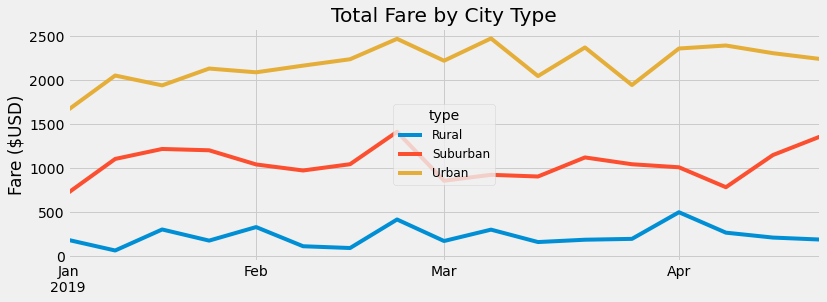

In [41]:
#pyber_resample_by_week["Rural"]
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style


#plt.scatter(urban_ride_count, 
#            urban_avg_fare, 
#            s=10*urban_driver_count, 
#            color="Coral", 
#            edgecolor="Black", 
#            linewidths=1, 
#            alpha=0.8, 
#            label="Urban")
#plt.title("PyBer Ride-Sharing Data(2019)")
#plt.ylabel("Average Fare($)")
#plt.xlabel("Total Number of Rides (Per City)")
#plt.grid(True)
# Add the legend
#plt.legend()


# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


fig = plt.figure

ax = pyber_resample_by_week.plot(figsize=(12,4))

ax.set_title("Total Fare by City Type")
ax.set_ylabel("Fare ($USD)")
ax.set_xlabel("")
fig.legend = "type"
#,mode="expanded"
# Help/advice/Zoom was recieved from Johnathan Tree(6:45pm - 8:26ish  Fri 1/28/2022) 
#                                                  regarding being stumped on MatPlot vs OO methods, very helpfull!
my_ax_lgnd = ax.legend(fontsize="12", loc="center", title="type")
#my_ax_lgnd = ax.legend(fontsize="12", mode="Expanded", 
#          title="", ncol=3, loc="lower center", bbox_to_anchor=(0.5, -0.5))
#ax.get_legend_title().setfontsize(14)
#my_ax_lgnd.get_title().set_fontsize(14)

#fig.figsize=(200,6)
#ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator(base=1))
##ax.plot(pyber_resample_by_week.index, pyber_resample_by_week["Urban"], "Coral")
##ax.plot(pyber_resample_by_week.index, pyber_resample_by_week["Suburban"], "skyblue")
##ax.plot(pyber_resample_by_week.index, pyber_resample_by_week["Rural"], "gold")

plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()
